## House Sales in King County, USA (Data Analysis with Python by IBM, Coursera)

In [36]:
import pandas as pd

path = '/kc_house_data.csv'
df = pd.read_csv(path)
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1. 

Display the data types of each column using the attribute dtype

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Question 2. 

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True.

In [56]:
#df.drop("id", axis = 1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_counts
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,3.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6511.333333
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,5251.659960
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,613.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4427.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,8241.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9460.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,10680.000000


### Question 3.
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [54]:
floors_counts = df['floors'].value_counts().to_frame()
floors_counts

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4. 

Use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 


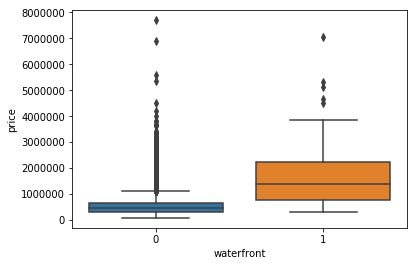

In [58]:
import seaborn as sns

ax = sns.boxplot(x='waterfront', y='price', data=df)

### Question 5.

Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. 


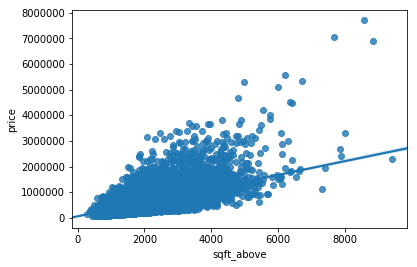

In [63]:
import matplotlib.pylab as plt

sns.regplot(x="sqft_above", y="price", data=df)
#plt.title('Correlation of sqft_above vs price')

### Question 6.

Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2. 

In [84]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = df[['sqft_living']]
Y = df[['price']]

lm.fit(X,Y)

Yhat = lm.predict(X)
print('The R-square is:', lm.score(X,Y))

The R-square is: 0.49285321790379316


### Question 7.

Fit a linear regression model to predict the 'price' using the list of features:
"floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade" and "sqft_living".

In [93]:
Z = df[["floors", "waterfront", "lat", "bedrooms", 
     "sqft_basement", "view", "bathrooms", 
     "sqft_living15", "sqft_above", "grade", "sqft_living"]]

lm.fit(Z, df['price'])

Yhat = lm.predict(Z)
print('The R-square is:', lm.score(Z, df['price']))

The R-square is: 0.657703884147486


### Question 8.

Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2.

In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Input=[('scale',StandardScaler()),
       ('model',LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
#ypipe[0:4]
r_squared = r2_score(Y, ypipe)
r_squared

0.6577151058279325

### Question 9.

Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data.

In [136]:
from sklearn.linear_model import Ridge
import numpy as np

pr=PolynomialFeatures(degree=2)

y_data = df['price']
x_data = df.drop('price', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
RigeModel=Ridge(alpha=0.1)

x_train_pr = pr.fit_transform(x_train[["floors", "waterfront", "lat", "bedrooms", 
     "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]])

x_test_pr = pr.fit_transform(x_test[["floors", "waterfront", "lat", "bedrooms", 
     "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]])

RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

r_squared = RigeModel.score(x_test_pr, y_test)
r_squared

0.7474128586181716

### Question 10.

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided.

In [135]:
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7474128586181716